In [2]:
!pip install pillow torchvision opencv-python numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
input_folder = os.path.join("..", "Synthetic_Image_Generation")  
output_folder = "./preprocessed_images/"
os.makedirs(output_folder, exist_ok=True)

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

✅ Processed & saved: ./preprocessed_images/processed_astronaut_rides_car_1.png
   Original Size: Width = 512, Height = 512
   Processed Size: Width = 224, Height = 224


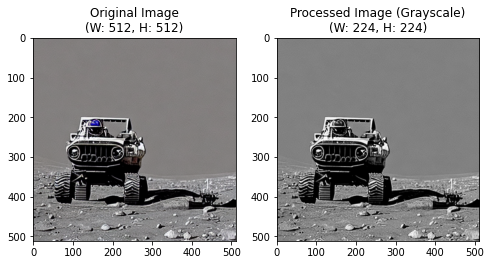

✅ Processed & saved: ./preprocessed_images/processed_astronaut_rides_car_2.png
   Original Size: Width = 512, Height = 512
   Processed Size: Width = 224, Height = 224


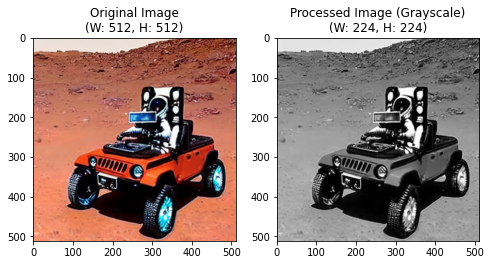

✅ Processed & saved: ./preprocessed_images/processed_astronaut_rides_car_3.png
   Original Size: Width = 512, Height = 512
   Processed Size: Width = 224, Height = 224


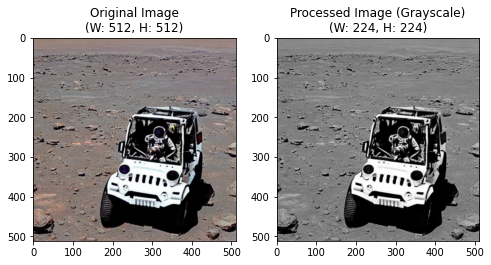

In [ ]:
# Process Each Image
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Load image
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert("RGB")  # Ensure RGB format

        # Get Original Image Size
        original_width, original_height = img.size  # (width, height)

        # Apply Transformations
        img_tensor = transform(img)

        # Get Transformed Image Size
        _, processed_height, processed_width = img_tensor.shape  # (Channels, Height, Width)

        # Convert to Grayscale
        grayscale_img = transforms.Grayscale()(img) if True else img

        # Save Preprocessed Image (For Verification)
        save_path = os.path.join(output_folder, f"processed_{filename}")
        grayscale_img.save(save_path)

        # Print Image Sizes
        print(f" Processed & saved: {save_path}")
        print(f"  Original Size: Width = {original_width}, Height = {original_height}")
        print(f"  Processed Size: Width = {processed_width}, Height = {processed_height}")

        # Display Original vs. Preprocessed Image
        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].imshow(img)
        ax[0].set_title(f"Original Image\n(W: {original_width}, H: {original_height})")
        ax[1].imshow(grayscale_img, cmap="gray")
        ax[1].set_title(f"Processed Image (Grayscale)\n(W: {processed_width}, H: {processed_height})")
        plt.show()